# Econ ProbSet1
Kendra Robbins 

## Exercise 1

Let $b$ represent the number of barrels remaining at the beginning of a period, and let $q$ indicate the number of barrels sold in a period, $b'$ the number of barrels remaining at the beginning of the next period, and $p$ the price of oil in the time period of $b$, and $p'$ the price of oil in the time period of $b'$. 

state variables: $r, B, b, p$

control variables: $q, b'$

transition equation: $b' = b - q$

Bellman Equation: $V(b) = \max_q  qp + \frac{1}{1+r} V(b')$

Sequence Equation: $V(B) = \max_{b_1, b_2, ...} \sum_{t=1}^{\infty} (\frac{1}{1+r})^t p_t b_t$

Solving for the Euler Eqn: 

by plugging the transition equation $q=b-b'$ into the Bellman:
    
$V(b) = \max_{b'} p(b-b') + \frac{1}{1+r} V(b')$
    
FOC: $ \frac{dV}{db'} = -p + \frac{1}{1+r} \frac {dV'(b')}{db'} =0$

$ \frac{dV(b)}{db} = p + [- p + \frac{1}{1+r} \frac{dV(b')}{db}]\frac{db'}{db} = p $ by FOC

so by the envelope condition $ \frac{dV(b')}{db'} = p' $
        

Euler Equation: $ p = \frac{1}{1+r} p'$

If $p_t=p_{t+1}$, then the seller will sell all oil in time period t. 

If $p_t > (1+r)p_t$, then the seller will sell all oil in time period t. 

An interior solution can occur only if $p_t=\frac{1}{1+r}p_{t+1}$. In that case, she is indifferent between selling in time period $t$ and time period $t+1$.

## Exercise 2

State Variables: $\delta, k_t, z_t, y_t, \alpha$

Control Variables: $c_t, i_t$

Bellman Equation: $ V(k_t, z_t) = \max_c u(c_t) + \beta E[V(k_t+1, z_t+1)]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import fminbound
import scipy.optimize as opt

beta = 0.96
gamma = .5
delta = .05
alpha = .4
sd = .2


In [27]:
'''
------------------------------------------------------------------------
Create Grid for Capital Stock K    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital stock grid
ub_k      = scalar, upper bound of capital stock grid 
size_k    = integer, number of grid points in capital stock state space
k_grid    = vector, size_w x 1 vector of cake grid points 
------------------------------------------------------------------------
'''
lb_k = 5.0
ub_k = 15.0
size_k = 20  # Number of grid points
k_grid = np.linspace(lb_k, ub_k, size_k)
kprime_grid = k_grid

In [28]:
import ar1_approx as ar1
size_z=20
ln_z_grid, pi_t = ar1.addacooper(size_z, 0, 0, .2)

z_grid = np.exp(ln_z_grid)
pi = np.transpose(pi_t)

In [4]:
## Consumption Utility Grid 

C = np.zeros((size_k,size_k,size_z))
for i in range(size_k):
    for j in range(size_k):
        for l in range(size_z):
            C[i,j,l] = (1-delta)*k_grid[i] + z_grid[l]*k_grid[i]**alpha - kprime_grid[j]
C[C<=0]=1e-15
U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -999999999
                

VFI:

In [5]:
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z))#true_VF # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z))

Vstore = np.zeros((size_k, size_k, VFmaxiter)) #initialize Vstore array
iter = 1

while VFdist > VFtol and iter < VFmaxiter:
    print(iter)
    for i in range(size_k): # k loop
        for j in range(size_k): # k t+1 loop
            for l in range(size_z): #z loop
                EV =0
                for r in range(size_z): # z t+1 loop
                    EV += pi[l, r]*V[j, r]
                Vmat[i, j, l] = U[i, j, l] + beta*EV
    Vstore[:, :, iter] = V.reshape(size_k, size_z,)
    TV = Vmat.max(1) #bellman operator
    PF = np.argmax(Vmat, axis=1)
    VFdist =(np.absolute(V - TV)).max()
    V=TV
    iter += 1

if iter < VFmaxiter:
    print('Value function converged after this many iterations:', iter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


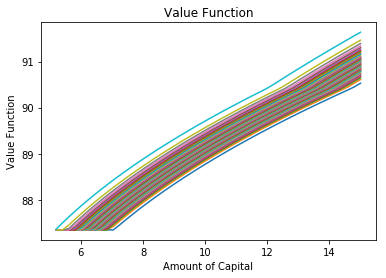

In [9]:
# Plot value function 
plt.figure()
plt.plot(k_grid[1:], VF[1:])
plt.xlabel('Amount of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()

<Figure size 432x288 with 0 Axes>

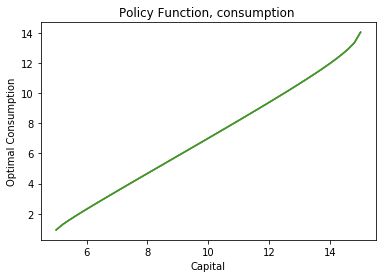

In [20]:
#Plot optimal consumption rule as a function of capital
optK = k_grid[PF]
optC = z_grid*k_grid**alpha + (1-delta) * k_grid - optK

plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][33], label='Consumption')
ax.plot(k_grid[:], optC[:][28], label='Consumption')
ax.plot(k_grid[:], optC[:][21], label='Consumption')

plt.xlabel('Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption ')
plt.show()


<Figure size 432x288 with 0 Axes>

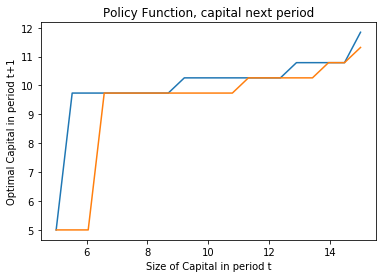

In [43]:
#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][19], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize

plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period')
plt.show()

## Exercise 3

Bellman Equation: $ V(k_t, z_t) = \max_c u(c_t) + \beta E_{{z_{t+1}|z_t}} [V(k_t+1, z_t+1)] $

In [29]:
ln_z_grid2, pi2_t = ar1.addacooper(size_z, 0, .8, .2)

z_grid2 = np.exp(ln_z_grid2)
pi2 = np.transpose(pi2_t)

In [30]:
C = np.zeros((size_k,size_k,size_z))
for i in range(size_k):
    for j in range(size_k):
        for l in range(size_z):
            C[i,j,l] = (1-delta)*k_grid[i] + z_grid2[l]*k_grid[i]**alpha - kprime_grid[j]
C[C<=0]=1e-15
U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -999999999

In [31]:
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros((size_k, size_z))#true_VF # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z))

Vstore = np.zeros((size_k, size_k, VFmaxiter)) #initialize Vstore array
iter = 1

while VFdist > VFtol and iter < VFmaxiter:
    print(iter)
    for i in range(size_k): # k loop
        for j in range(size_k): # k t+1 loop
            for l in range(size_z): #z loop
                EV =0
                for r in range(size_z): # z t+1 loop
                    EV += pi[l, r]*V[j, r]
                Vmat[i, j, l] = U[i, j, l] + beta*EV
    Vstore[:, :, iter] = V.reshape(size_k, size_z,)
    TV = Vmat.max(1) #bellman operator
    PF = np.argmax(Vmat, axis=1)
    VFdist =(np.absolute(V - TV)).max()
    V=TV
    iter += 1

if iter < VFmaxiter:
    print('Value function converged after this many iterations:', iter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<Figure size 432x288 with 0 Axes>

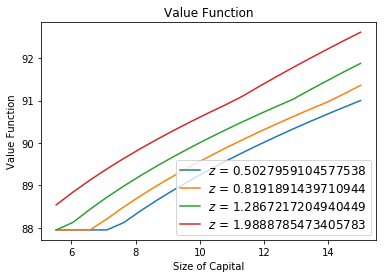

In [35]:

# Plot value function
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid2[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid2[5]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid2[15]))
ax.plot(k_grid[1:], VF[1:, 19], label='$z$ = ' + str(z_grid2[19]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital')
plt.ylabel('Value Function')
plt.title('Value Function')
plt.show()

<Figure size 432x288 with 0 Axes>

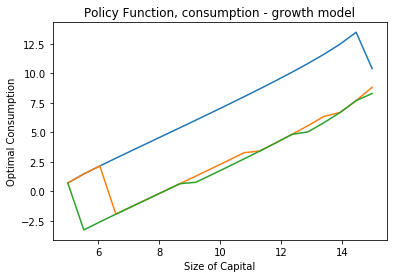

In [36]:
optK = k_grid[PF]
optC = z_grid2 * k_grid ** (alpha) + (1 - delta) * k_grid - optK
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][12], label='Consumption')
ax.plot(k_grid[:], optC[:][18], label='Consumption')
ax.plot(k_grid[:], optC[:][19], label='Consumption')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
plt.xlabel('Size of Capital')
plt.ylabel('Optimal Consumption')
plt.title('Policy Function, consumption - growth model')
plt.show()

<Figure size 432x288 with 0 Axes>

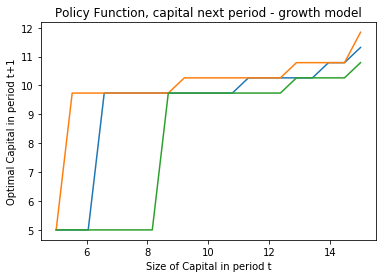

In [41]:

#Plot optimal capital in period t + 1 rule as a function of cake size
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][18], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][19], label='Capital in period t+1')
ax.plot(k_grid[:], optK[:][17], label='Capital in period t+1')
# Now add the legend with some customizations.
#legend = ax.legend(loc='upper left', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('Size of Capital in period t')
plt.ylabel('Optimal Capital in period t+1')
plt.title('Policy Function, capital next period')
plt.show()

## Exercise 4

Bellman: \newline

$ V(w) = \max_w \{V^U(w), V^J(w)\} $ 

$V^U(w)= b+\beta E[V(w)]  $ 

$V^J(w) = E_0 \sum_{t=0}^\infty \beta^t w = \frac{w}{1-\beta}$


In [47]:
beta = 0.96
b = 0.05
mu = 0
sigma = .15
size_w = 20
rho = 0



In [48]:
ln_w_grid, pi3_t = ar1.addacooper(size_w, mu, rho, sigma)
w_grid = np.exp(ln_w_grid)
pi3 = np.transpose(pi3_t)

In [49]:
U = np.zeros(size_w) 
for i in range(size_w): # loop over w
        U[i] = (w_grid[i])/(1-beta)

In [50]:
VFtol = 1e-8 
VFdist = 7.0 
VFmaxiter = 500 
V = np.zeros(size_w) # initial guess at value function
TV = np.zeros(size_w)
PF_discrete = np.zeros(size_w)
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:
    print('This is the distance', VFdist, VFiter)
    for i in range(size_w): # loop over w
        EV = 0
        for ii in range(size_w):  # loop over w
            EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
        U_emp = U[i]
        Vun = b + beta * EV 
        TV[i] = max(U_emp, Vun)
        PF_discrete[i] = U_emp >= Vun  # = 1 if take job
            
    Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
    VFdist = (np.absolute(V - TV)).max()  # check distance
    V = TV
    VFiter += 1 

if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')

This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3


In [51]:
threshold_w = w_grid[np.argmax(PF_discrete)]
print(threshold_w)

1.02879378655138


<Figure size 432x288 with 0 Axes>

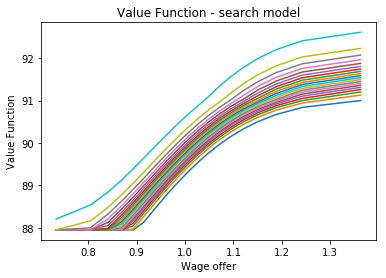

In [52]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[:], VF[:])
# Set the fontsize
plt.xlabel('Wage offer')
plt.ylabel('Value Function')
plt.title('Value Function - search model')
plt.show()

In [56]:
#Set grid of b
grid_b = np.linspace(0.05, 1, 20)
threshold_vec = np.zeros(20)


for q in range(20):

    VFtol = 1e-8 
    VFdist = 7.0 
    VFmaxiter = 500 
    V = np.zeros(size_w) # initial guess at value function
    TV = np.zeros(size_w)
    PF_discrete = np.zeros(size_w)
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    VFiter = 1 
    while VFdist > VFtol and VFiter < VFmaxiter:
        print('This is the distance', VFdist, VFiter)
        for i in range(size_w): # loop over w
            EV = 0
            for ii in range(size_w):  # loop over w
                EV += pi[i, ii] * V[ii]   # note can move one space because of how we constructed grid
            U_emp = U[i]
            Vun = grid_b[q] + beta * EV 
            TV[i] = max(U_emp, Vun)
            PF_discrete[i] = U_emp >= Vun  # = 1 if take job
            
        Vstore[:, VFiter] = TV # store value function at each iteration for graphing later 
        VFdist = (np.absolute(V - TV)).max()  # check distance
        V = TV
        VFiter += 1 

    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')            


    VF = V # solution to the functional equation
    threshold_vec[q]=w_grid[np.argmax(PF_discrete)]

This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the distance 7.0 1
This is the distance 34.06541838101939 2
Value function converged after this many iterations: 3
This is the dist

In [57]:
print(threshold_vec)


[1.02879379 1.04899293 1.04899293 1.04899293 1.04899293 1.04899293
 1.07049287 1.07049287 1.07049287 1.07049287 1.07049287 1.07049287
 1.09389872 1.09389872 1.09389872 1.09389872 1.09389872 1.09389872
 1.12012911 1.12012911]


<Figure size 432x288 with 0 Axes>

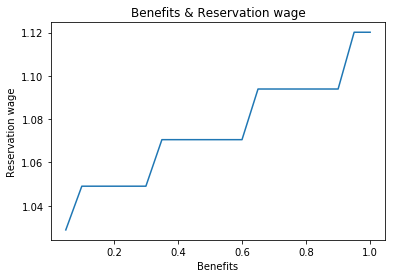

In [59]:
# Plot resevation wage as function of benefits 
plt.figure()
fig, ax = plt.subplots()
ax.plot(grid_b[:], threshold_vec[:])
# Set the fontsize
plt.xlabel('Benefits')
plt.ylabel('Reservation wage')
plt.title('Benefits & Reservation wage')
plt.show()

In [ ]:
Higher unemployment benefits increase the reservation wage 